# Proyecto final ADA 2023-1

## Integrantes

* Andrés Felipe Aparicio Mestre - [anapariciom@unal.edu.co](mailto:anapariciom@unal.edu.co)
* Emmanuel López Rodríguez - [emlopezr@unal.edu.co](mailto:emlopezr@unal.edu.co)
* Johan Madroñero Cuervo - [jmadronero@unal.edu.co](mailto:jmadronero@unal.edu.co)
* Maria Paula Duque Muñoz - [maduquem@unal.edu.co](mailto:maduquem@unal.edu.co)

## Planteamiento

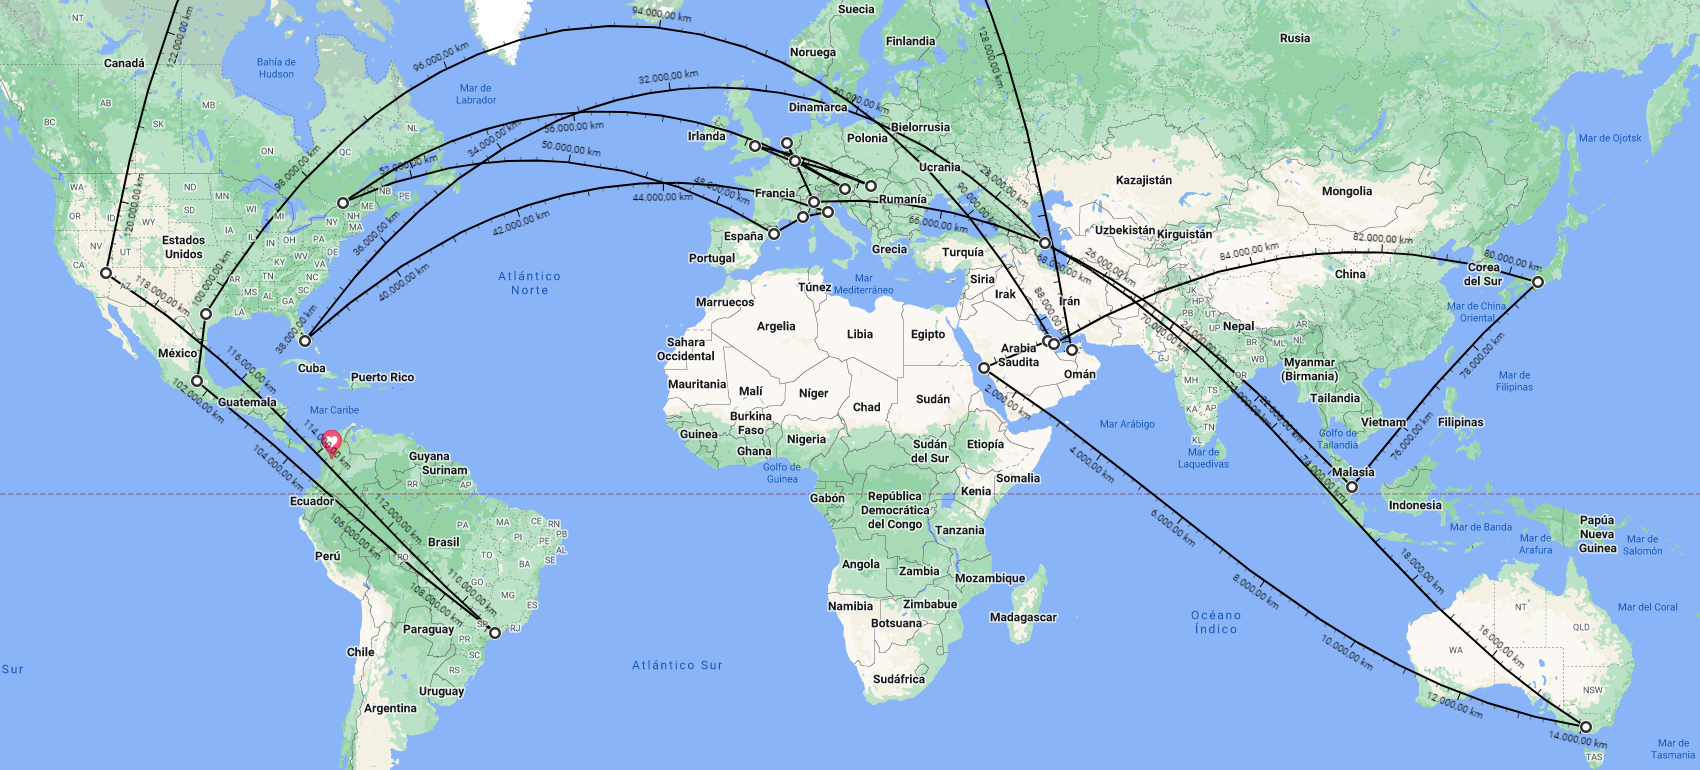

# Solución

## Preprocesamiento de los datos

Inicialmente se consiguen las coordenadas de todos los circuitos del calendario 2023 de la Formula 1 *(Incluyendo el "Autodromo Internazionale Enzo e Dino Ferrari" en Imola, ya que este año se canceló pero inicialmente hacía parte del calendario)*

* Los datos y el orden de los circuitos se pueden consultar en estos enlaces [Wikipedia](https://en.wikipedia.org/wiki/2023_Formula_One_World_Championship#Calendar) y [Formula1.com](https://www.formula1.com/en/racing/2023.html)

* Se obtuvo la latitud y longitud de cada circuito usando la página [GeoHack](https://geohack.toolforge.org/)

Mediante la fórmula del semiverseno ([Harvesine Formula](https://en.wikipedia.org/wiki/Haversine_formula)) se calculan las distancias entre todos ellos y con ellas se construye un grafo representado en un diccionario de diccinarios.

$$d = 2R \, \arcsin \sqrt{\sin^{2} \frac{\varphi_{1} - \varphi_{2}}{2} + \cos\varphi_{1} \cos\varphi_{2} \sin^{2} \frac{\lambda_{1} - \lambda_{2}}{2}}$$

In [ ]:
from numpy import sqrt, sin, cos, arcsin, radians
from json import dumps # Para imprimir bien el grafo

circuits = [
    ('Bahrain International Circuit', 'Sakhir', 'Bahrain', 26.0325, 50.510556),
    ('Jeddah Corniche Circuit', 'Jeddah', 'Saudi Arabia', 21.631944, 39.104444),
    ('Albert Park Circuit', 'Melbourne', 'Australia', -37.849722, 144.968333),
    ('Baku City Circuit', 'Baku', 'Azerbaijan', 40.3725, 49.853333),
    ('Miami International Autodrome', 'Miami', 'United States', 25.958056, -80.238889),
    ('Autodromo Internazionale Enzo e Dino Ferrari', 'Imola', 'Italy', 44.341111, 11.713333),
    ('Circuit de Monaco', 'Montecarlo', 'Monaco', 43.734722, 7.420556),
    ('Circuit de Barcelona-Catalunya', 'Barcelona', 'Spain', 41.57, 2.261111),
    ('Circuit Gilles Villeneuve', 'Montreal', 'Canada', 45.500556, -73.5225),
    ('Red Bull Ring', 'Spielberg', 'Austria', 47.219722, 14.764722),
    ('Silverstone Circuit', 'Silverstone', 'United Kingdom', 52.078611, -1.016944),
    ('Hungaroring', 'Budapest', 'Hungary', 47.582222, 19.251111),
    ('Circuit de Spa-Francorchamps', 'Spa-Francorchamps', 'Belgium', 50.437222, 5.971389),
    ('Circuit Zandvoort', 'Zandvoort', 'Netherlands', 52.388819, 4.540922),
    ('Autodromo Nazionale di Monza', 'Monza', 'Italy', 45.620556, 9.289444),
    ('Marina Bay Street Circuit', 'Marina Bay', 'Singapore', 1.291531, 103.86385),
    ('Suzuka International Racing Course', 'Suzuka', 'Japan', 34.843056, 136.540556),
    ('Lusail International Circuit', 'Lusail', 'Qatar', 25.49, 51.454167),
    ('Circuit of the Americas', 'Austin', 'United States', 30.132778, -97.641111),
    ('Autódromo Hermanos Rodriguez', 'Mexico City', 'Mexico', 19.406111, -99.0925),
    ('Autódromo José Carlos Pace', 'Sao Paulo', 'Brazil', -23.701111, -46.697222),
    ('Las Vegas Strip Circuit', 'Las Vegas', 'United States', 36.119684, -115.172599),
    ('Yas Marina Circuit', 'Abu Dhabi', 'United Arab Emirates', 24.467222, 54.603056),
]

# Formula para calcular distancias con latitud y longitud (Haversine formula)
def haversineDistance(circuit1, circuit2):
    # d = 2R × sin⁻¹(√[sin²((θ₂ - θ₁)/2) + cosθ₁ × cosθ₂ × sin²((φ₂ - φ₁)/2)])

    # θ₁, φ₁ – lat1, lon1 -> Radians
    # θ₂, φ₂ – lat2, lon2 -> Radians
    # R – Radio de la tierra (R = 6371km)
    # d = Distancia en Km entre los dos puntos

    lat1, lon1 = radians(circuit1[3]), radians(circuit1[4])
    lat2, lon2 = radians(circuit2[3]), radians(circuit2[4])

    d = 2*6371 * arcsin(sqrt((sin((lat2 - lat1)/2)**2) + (cos(lat1) * cos(lat2) * (sin((lon2 - lon1)/2)**2))))

    return round(d, 2)


# Crear y rellenar el grafo con las distancias entre todos los circuitos
def generateGraph(circuits): #O(N^2)
    graph = {circuit[1]: {} for circuit in circuits}

    for circuit1 in circuits:
        city1 = circuit1[1]

        # Calcular distancias con cada uno de los otros circuitos
        for circuit2 in circuits:
            city2 = circuit2[1]

            # Poner un infinito como distancia a sí mismo
            if city1 == city2:
                graph[city1][city2] = float('inf')
                continue

            d = haversineDistance(circuit1, circuit2)
            graph[city1][city2], graph[city2][city1] = d, d

    return graph

graph = generateGraph(circuits)

print(dumps(graph, indent=4))

{
    "Sakhir": {
        "Sakhir": Infinity,
        "Jeddah": 1258.42,
        "Melbourne": 12112.65,
        "Baku": 1595.69,
        "Miami": 12185.61,
        "Imola": 4018.42,
        "Montecarlo": 4332.64,
        "Barcelona": 4710.92,
        "Montreal": 10258.89,
        "Spielberg": 3910.83,
        "Silverstone": 5158.07,
        "Budapest": 3629.0,
        "Spa-Francorchamps": 4640.38,
        "Zandvoort": 4805.04,
        "Monza": 4242.25,
        "Marina Bay": 6327.17,
        "Suzuka": 8054.3,
        "Lusail": 112.11,
        "Austin": 12908.76,
        "Mexico City": 13990.04,
        "Sao Paulo": 11813.24,
        "Las Vegas": 12942.72,
        "Abu Dhabi": 446.84
    },
    "Jeddah": {
        "Sakhir": 1258.42,
        "Jeddah": Infinity,
        "Melbourne": 12817.13,
        "Baku": 2317.67,
        "Miami": 11605.61,
        "Imola": 3559.52,
        "Montecarlo": 3810.51,
        "Barcelona": 4087.37,
        "Montreal": 9929.36,
        "Spielberg": 3585.07,
  

## Cálculo de la distancia recorrida actual



In [ ]:
# Distancia recorrida actual en kilometros
currentTotalDistance = 0

for i in range(1, len(circuits)):
    currentTotalDistance += haversineDistance(circuits[i-1], circuits[i])

print(f'Total recorrido: {round(currentTotalDistance, 2)} Km')

Total recorrido: 132163.47 Km


## Solución inical (Algoritmo greedy)

En primer lugar se realiza una aproximación greedy al problema. Por lo que se convierte el grafo en una representación matricial y la solución inicial consiste en elegir por cada fila la distancia más cercana a recorrer en el próximo paso.

In [ ]:
from prettytable import PrettyTable # Para imprimir bien la matriz

# Se usará una matriz en vez del diccionario de diccionarios
matrix = [list(j.values()) for (_, j) in graph.items()]

p = PrettyTable()
for row in matrix: p.add_row(row)

print(p.get_string(header=False, border=False))

   inf     1258.42   12112.65  1595.69   12185.61  4018.42   4332.64   4710.92   10258.89  3910.83   5158.07    3629.0   4640.38   4805.04   4242.25   6327.17    8054.3    112.11   12908.76  13990.04  11813.24  12942.72   446.84  
 1258.42     inf     12817.13  2317.67   11605.61  3559.52   3810.51   4087.37   9929.36   3585.07   4815.75   3387.96   4307.68   4515.09   3797.32   7353.78   9293.26   1329.12   12632.6   13574.55  10555.29  13046.96  1615.84  
 12112.65  12817.13    inf     12989.09  15594.44  16086.6   16422.24  16823.36  16741.08  15878.76  16947.24  15546.29  16511.75  16572.56  16287.46  6057.73   8129.71   12000.57  14286.03  13563.72  13063.22  13131.4   11674.78 
 1595.69   2317.67   12989.09    inf     11015.92  3136.08   3484.88    3946.5   8930.46   2890.54   4030.59   2557.24   3545.36   3652.58   3313.73   6946.61   7342.51    1661.5   11489.36  12631.8   12217.45  11372.96  1823.13  
 12185.61  11605.61  15594.44  11015.92    inf     8172.77   7870.82   7536.

In [ ]:
def greedyRoute(graph, firstCity): # O(N^2)
    # Conseguir la matriz a partir del diccionario de diccionarios
    matrix = [list(j.values()) for (_, j) in graph.items()] #O(N)

    totalDistance = 0
    route = []

    # Tener en cuenta la primera ciudad
    currentCity = firstCity
    route.append(currentCity)

    while len(route) < len(graph):
        # Se busca la mínima distancia a la próxima ciudad disponible
        minDistance = min(matrix[currentCity])
        nextCity = matrix[currentCity].index(minDistance)

        # Sumar la distancia a recorrer al total recorrido
        totalDistance += minDistance

        # Como ya se visitó la ciudad actual, se hace "inaccesible"
        for row in range(len(matrix)):
            matrix[row][currentCity] = float('inf')

        # Se visita la siguiente ciudad y se repite el mismo proceso
        route.append(nextCity)
        currentCity = nextCity

    return totalDistance, route

# Probar el algoritmo usando como punto de partida cada ciudad y buscar el menor
bestDistance, bestRoute = float('inf'), []

for i in range(len(graph)): # O(N^3)
    distance, route = greedyRoute(graph, i)

    if distance < bestDistance:
        bestDistance, bestRoute = distance, route

# Imprimir los resultados
print(f'Total recorrido: {round(bestDistance, 2)} Km')
print(f'Mejora con respecto al actual: {round(((currentTotalDistance-bestDistance)/currentTotalDistance)*100, 2)}%')

print('\nRuta:')
for i, city in enumerate(bestRoute):
    print(f'{i+1}. {circuits[city][1]}, {circuits[city][2]}')

Total recorrido: 51280.4 Km
Mejora con respecto al actual: 61.2%

Ruta:
1. Sao Paulo, Brazil
2. Miami, United States
3. Austin, United States
4. Mexico City, Mexico
5. Las Vegas, United States
6. Montreal, Canada
7. Silverstone, United Kingdom
8. Zandvoort, Netherlands
9. Spa-Francorchamps, Belgium
10. Monza, Italy
11. Imola, Italy
12. Montecarlo, Monaco
13. Barcelona, Spain
14. Spielberg, Austria
15. Budapest, Hungary
16. Baku, Azerbaijan
17. Sakhir, Bahrain
18. Lusail, Qatar
19. Abu Dhabi, United Arab Emirates
20. Jeddah, Saudi Arabia
21. Marina Bay, Singapore
22. Suzuka, Japan
23. Melbourne, Australia


Se observa que esta aproximación disminuye la distancia total recorrida comparado con la actual en un 61.2%, pero esta aproximación no es totalmente óptima, por lo que en los lugares aledaños a los "problemáticos" se opta por calcular la organización de estos nodos usando búsqueda exhaustiva


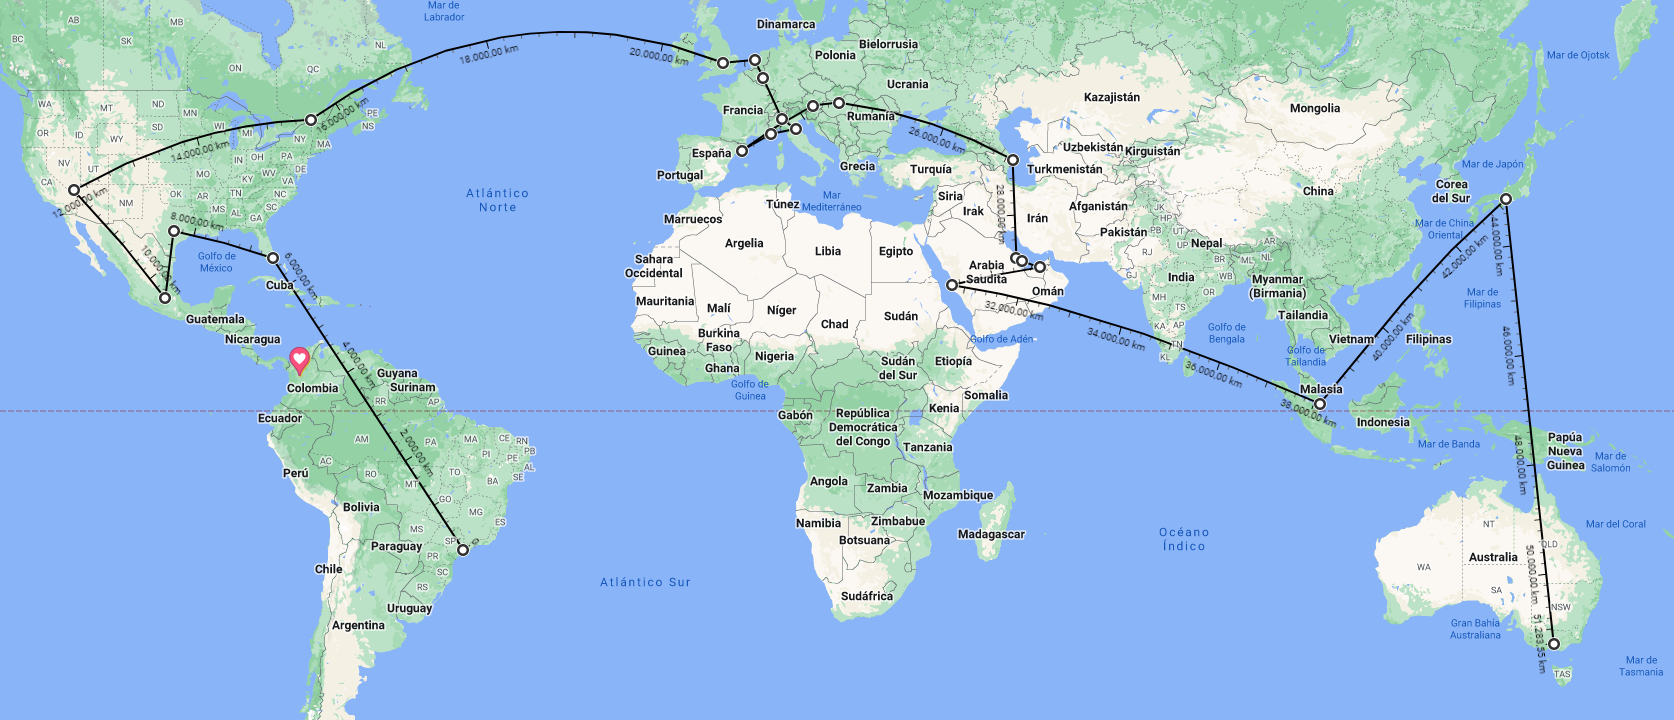

## Mejoramiento de la solución usando búsqueda exhaustiva

### Nodos 1-6 (América)

En primer lugar, se identifica un potencial de mejoramiento en el recorrido de los nodos del continente americano (Nodos 1-6). Actualmente se recorren de esta manera:

1. Sao Paulo, Brazil
2. Miami, United States
3. Austin, United States
4. Mexico City, Mexico
5. Las Vegas, United States
6. Montreal, Canada

Como en este cruce entran en juego 6 nodos, es posible permitirse usar búsqueda exhaustiva para buscar la mejor solución, ya que hay solo 720 combinaciones posibles.

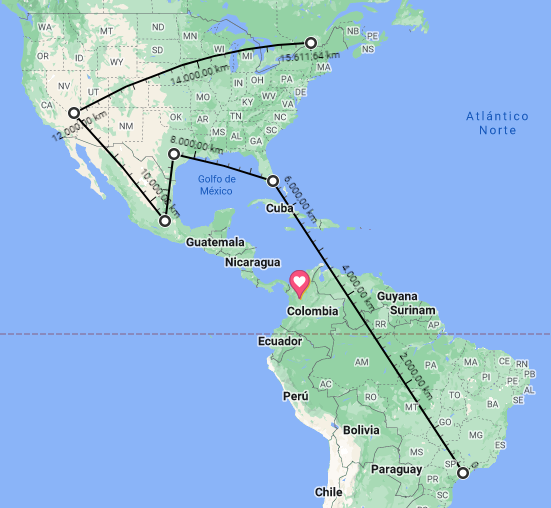

In [ ]:
from itertools import permutations

circuits1 = [
    ('Autódromo José Carlos Pace', 'Sao Paulo', 'Brazil', -23.701111, -46.697222),
    ('Miami International Autodrome', 'Miami', 'United States', 25.958056, -80.238889),
    ('Circuit of the Americas', 'Austin', 'United States', 30.132778, -97.641111),
    ('Autódromo Hermanos Rodriguez', 'Mexico City', 'Mexico', 19.406111, -99.0925),
    ('Las Vegas Strip Circuit', 'Las Vegas', 'United States', 36.119684, -115.172599),
    ('Circuit Gilles Villeneuve', 'Montreal', 'Canada', 45.500556, -73.5225),
]

# Distancia recorrida actual de esos nodos
currentDistance = 0

for i in range(1, len(circuits1)):
    currentDistance += haversineDistance(circuits1[i-1], circuits1[i])

# Generar todos los posibles recorridos
array = [i for i in range(len(circuits1))]
perms = permutations(array)

# Solo se necesitan los recorridos que empiezan en Sao Paulo y terminan en Montreal
perms = list(filter(lambda i: i[0] == 0 and i[-1] == 5, perms))
print(f'Complejidad: {len(perms)} posibles soluciones\n')

# Hacer la búsqueda exhaustiva buscando la ruta más corta
bestDistance, bestRoute = float('inf'), []

for perm in perms:
    distance = 0

    for i in range(1, len(perm)):
        distance += haversineDistance(circuits1[perm[i-1]], circuits1[perm[i]])

    if distance < bestDistance:
        bestDistance, bestRoute = distance, perm

# Imprimir los resultados
print(f'Total recorrido actual: {round(currentDistance, 2)} Km')
print(f'Total recorrido óptimo: {round(bestDistance, 2)} Km')
print(f'Mejora con respecto al actual: {round(((currentDistance-bestDistance)/currentDistance)*100, 2)}%')

print('\nRuta:')
for i, city in enumerate(bestRoute):
    print(f'{i+1}. {circuits1[city][1]}, {circuits1[city][2]}')

Complejidad: 24 posibles soluciones

Total recorrido actual: 15611.23 Km
Total recorrido óptimo: 15234.17 Km
Mejora con respecto al actual: 2.42%

Ruta:
1. Sao Paulo, Brazil
2. Miami, United States
3. Mexico City, Mexico
4. Austin, United States
5. Las Vegas, United States
6. Montreal, Canada


### Nodos 9-14 (Europa)

Este es el punto más crítico ya que al recorrer los nodos 9-14 se crea un cruce, que indica que este sub-recorrido no es óptimo.

9. Spa-Francorchamps, Belgium
10. Monza, Italy
11. Imola, Italy
12. Montecarlo, Monaco
13. Barcelona, Spain
14. Spielberg, Austria

Como en este cruce entran en juego 6 nodos, se puede permitir usar búsqueda exhaustiva para buscar la mejor solución, ya que hay solo 720 combinaciones posibles.

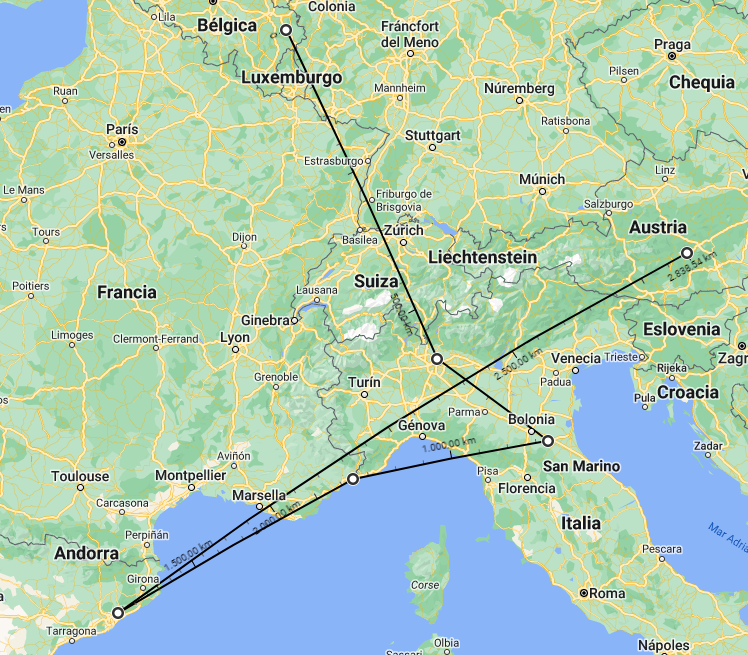

In [ ]:
from itertools import permutations

circuits1 = [
    ('Circuit de Spa-Francorchamps', 'Spa-Francorchamps', 'Belgium', 50.437222, 5.971389),
    ('Autodromo Nazionale di Monza', 'Monza', 'Italy', 45.620556, 9.289444),
    ('Autodromo Internazionale Enzo e Dino Ferrari', 'Imola', 'Italy', 44.341111, 11.713333),
    ('Circuit de Monaco', 'Montecarlo', 'Monaco', 43.734722, 7.420556),
    ('Circuit de Barcelona-Catalunya', 'Barcelona', 'Spain', 41.57, 2.261111),
    ('Red Bull Ring', 'Spielberg', 'Austria', 47.219722, 14.764722),
]
# Distancia recorrida actual de esos nodos
currentDistance = 0

for i in range(1, len(circuits1)):
    currentDistance += haversineDistance(circuits1[i-1], circuits1[i])


# Generar todos los posibles recorridos
array = [i for i in range(len(circuits1))]
perms = permutations(array)

# Solo se necesitan los recorridos que empiezan en Spa-Francorchamps y terminan en Spielberg
perms = list(filter(lambda i: i[0] == 0 and i[-1] == 5, perms))
print(f'Complejidad: {len(perms)} posibles soluciones\n')

# Hacer la búsqueda exhaustiva buscando la ruta más corta
bestDistance, bestRoute = float('inf'), []

for perm in perms:
    distance = 0

    for i in range(1, len(perm)):
        distance += haversineDistance(circuits1[perm[i-1]], circuits1[perm[i]])

    if distance < bestDistance:
        bestDistance, bestRoute = distance, perm

# Imprimir los resultados
print(f'Total recorrido actual: {round(currentDistance, 2)} Km')
print(f'Total recorrido óptimo: {round(bestDistance, 2)} Km')
print(f'Mejora con respecto al actual: {round(((currentDistance-bestDistance)/currentDistance)*100, 2)}%')

print('\nRuta:')
for i, city in enumerate(bestRoute):
    print(f'{i+9}. {circuits1[city][1]}, {circuits1[city][2]}')

Complejidad: 24 posibles soluciones

Total recorrido actual: 2835.98 Km
Total recorrido óptimo: 2404.45 Km
Mejora con respecto al actual: 15.22%

Ruta:
9. Spa-Francorchamps, Belgium
10. Barcelona, Spain
11. Montecarlo, Monaco
12. Monza, Italy
13. Imola, Italy
14. Spielberg, Austria


### Nodos 16-21 (Medio Oriente)

Similar al caso anterior, aunque sin un cruce, notamos potencial de mejora en ese subconjunto del recorrido

16. Baku, Azerbaijan
17. Sakhir, Bahrain
18. Lusail, Qatar
19. Abu Dhabi, United Arab Emirates
20. Jeddah, Saudi Arabia
21. Marina Bay, Singapore

Como en este cruce entran en juego 6 nodos, se puede permitir  usar búsqueda exhaustiva para buscar la mejor solución, ya que hay solo 720 combinaciones posibles.

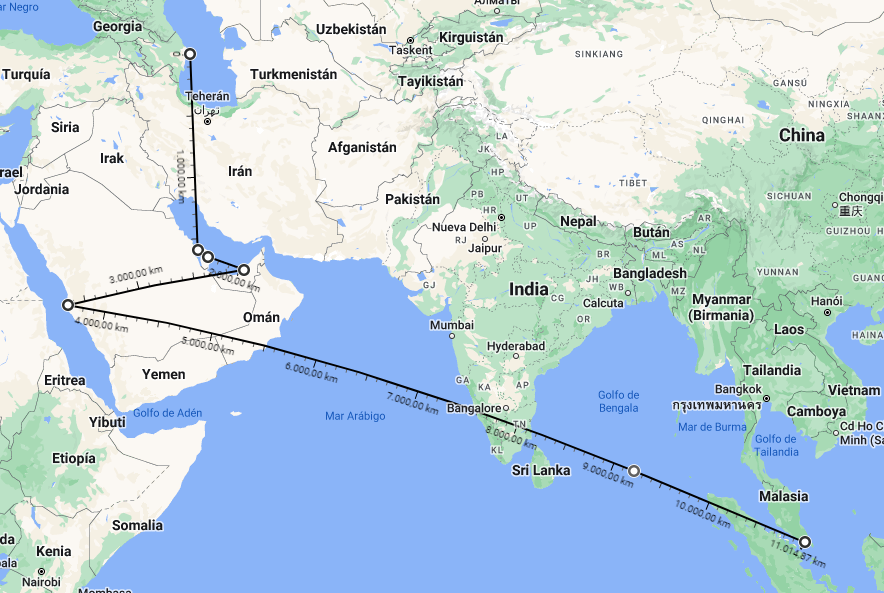

In [ ]:
from itertools import permutations

circuits1 = [
    ('Baku City Circuit', 'Baku', 'Azerbaijan', 40.3725, 49.853333),
    ('Bahrain International Circuit', 'Sakhir', 'Bahrain', 26.0325, 50.510556),
    ('Lusail International Circuit', 'Lusail', 'Qatar', 25.49, 51.454167),
    ('Yas Marina Circuit', 'Abu Dhabi', 'United Arab Emirates', 24.467222, 54.603056),
    ('Jeddah Corniche Circuit', 'Jeddah', 'Saudi Arabia', 21.631944, 39.104444),
    ('Marina Bay Street Circuit', 'Marina Bay', 'Singapore', 1.291531, 103.86385),
]

# Distancia recorrida actual de esos nodos
currentDistance = 0

for i in range(1, len(circuits1)):
    currentDistance += haversineDistance(circuits1[i-1], circuits1[i])

# Generar todos los posibles recorridos
array = [i for i in range(len(circuits1))]
perms = permutations(array)

# Solo se necesitan los recorridos que empiezan en Baku y terminan en Marina Bay
perms = list(filter(lambda i: i[0] == 0 and i[-1] == 5, perms))
print(f'Complejidad: {len(perms)} posibles soluciones\n')

# Hacer la búsqueda exhaustiva buscando la ruta más corta
bestDistance, bestRoute = float('inf'), []

for perm in perms:
    distance = 0

    for i in range(1, len(perm)):
        distance += haversineDistance(circuits1[perm[i-1]], circuits1[perm[i]])

    if distance < bestDistance:
        bestDistance, bestRoute = distance, perm

# Imprimir los resultados
print(f'Total recorrido actual: {round(currentDistance, 2)}Km')
print(f'Total recorrido óptimo: {round(bestDistance, 2)}Km')
print(f'Mejora con respecto al actual: {round(((currentDistance-bestDistance)/currentDistance)*100, 2)}%')

print('\nRuta:')
for i, city in enumerate(bestRoute):
    print(f'{i+16}. {circuits1[city][1]}, {circuits1[city][2]}')

Complejidad: 24 posibles soluciones

Total recorrido actual: 11014.56Km
Total recorrido óptimo: 9907.65Km
Mejora con respecto al actual: 10.05%

Ruta:
16. Baku, Azerbaijan
17. Jeddah, Saudi Arabia
18. Sakhir, Bahrain
19. Lusail, Qatar
20. Abu Dhabi, United Arab Emirates
21. Marina Bay, Singapore


## Solución final

Aplicando las mejoras encontradas utilizando búsqueda exhaustiva se llega a la conclución de que el recorrido más óptimo para los 23 circuitos del calendario 2023 de la Formula 1 es:

1. Sao Paulo, Brazil
2. Miami, United States
3. Mexico City, Mexico
4. Austin, United States
5. Las Vegas, United States
6. Montreal, Canada
7. Silverstone, United Kingdom
8. Zandvoort, Netherlands
9. Spa-Francorchamps, Belgium
10. Barcelona, Spain
11. Montecarlo, Monaco
12. Monza, Italy
13. Imola, Italy
14. Spielberg, Austria
15. Budapest, Hungary
16. Baku, Azerbaijan
17. Jeddah, Saudi Arabia
18. Sakhir, Bahrain
19. Lusail, Qatar
20. Abu Dhabi, United Arab Emirates
21. Marina Bay, Singapore
22. Suzuka, Japan
23. Melbourne, Australia

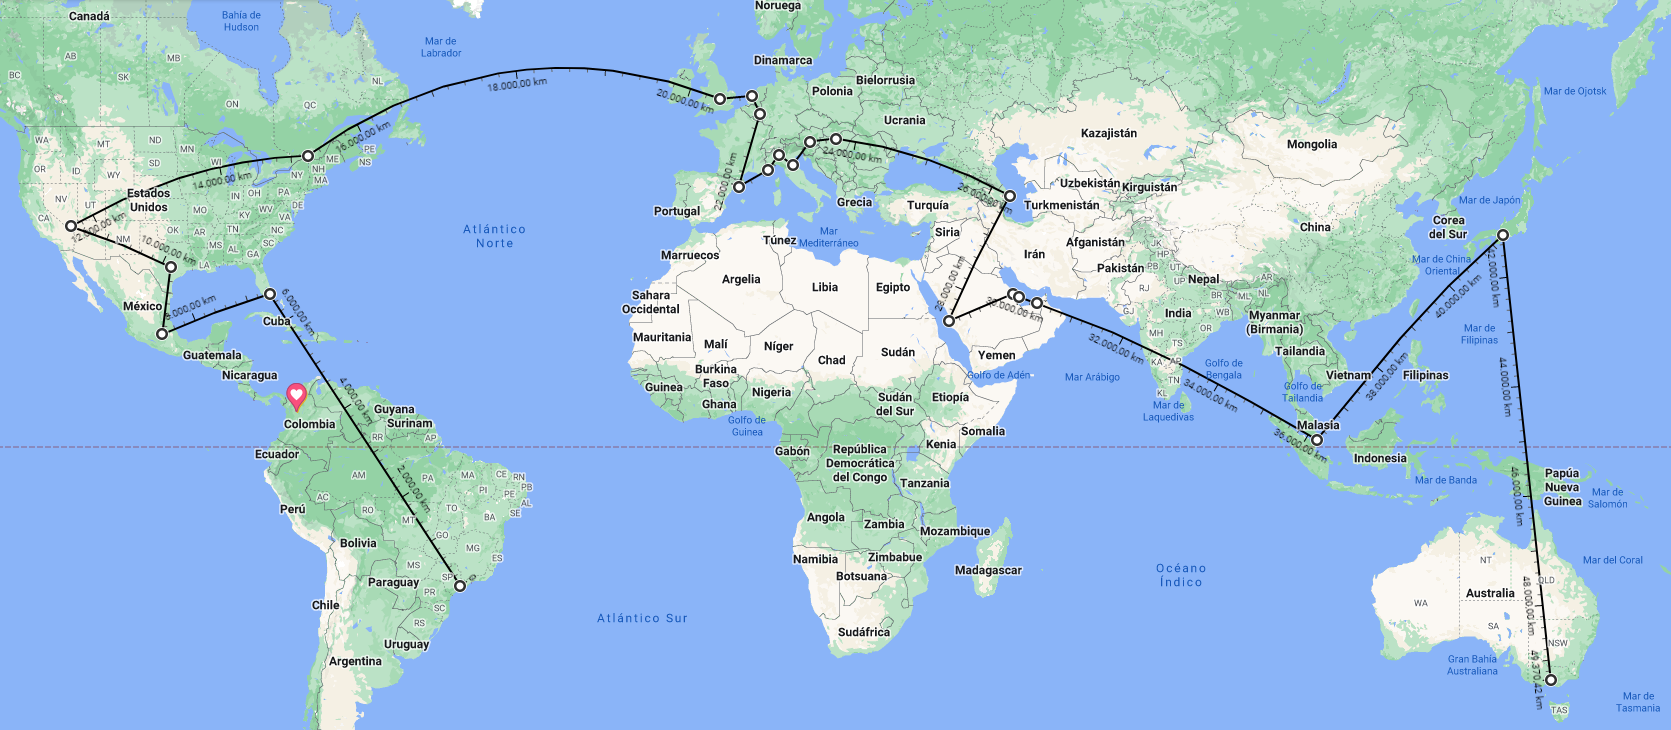

Cabe aclarar que este orden puede darse de manera invesa, ya que las distancias recorridas son iguales y, Aunque no se tiene en cuenta en este trabajo, el orden inverso podría cumplir de mejor manera con otras resticciones en la realización de los Grandes Premios (Tales como cuestiones climáticas o religiosas)

In [ ]:
circuits = [
    ('Autódromo José Carlos Pace', 'Sao Paulo', 'Brazil', -23.701111, -46.697222),
    ('Miami International Autodrome', 'Miami', 'United States', 25.958056, -80.238889),
    ('Autódromo Hermanos Rodriguez', 'Mexico City', 'Mexico', 19.406111, -99.0925),
    ('Circuit of the Americas', 'Austin', 'United States', 30.132778, -97.641111),
    ('Las Vegas Strip Circuit', 'Las Vegas', 'United States', 36.119684, -115.172599),
    ('Circuit Gilles Villeneuve', 'Montreal', 'Canada', 45.500556, -73.5225),
    ('Silverstone Circuit', 'Silverstone', 'United Kingdom', 52.078611, -1.016944),
    ('Circuit Zandvoort', 'Zandvoort', 'Netherlands', 52.388819, 4.540922),
    ('Circuit de Spa-Francorchamps', 'Spa-Francorchamps', 'Belgium', 50.437222, 5.971389),
    ('Circuit de Barcelona-Catalunya', 'Barcelona', 'Spain', 41.57, 2.261111),
    ('Circuit de Monaco', 'Montecarlo', 'Monaco', 43.734722, 7.420556),
    ('Autodromo Nazionale di Monza', 'Monza', 'Italy', 45.620556, 9.289444),
    ('Autodromo Internazionale Enzo e Dino Ferrari', 'Imola', 'Italy', 44.341111, 11.713333),
    ('Red Bull Ring', 'Spielberg', 'Austria', 47.219722, 14.764722),
    ('Hungaroring', 'Budapest', 'Hungary', 47.582222, 19.251111),
    ('Baku City Circuit', 'Baku', 'Azerbaijan', 40.3725, 49.853333),
    ('Jeddah Corniche Circuit', 'Jeddah', 'Saudi Arabia', 21.631944, 39.104444),
    ('Bahrain International Circuit', 'Sakhir', 'Bahrain', 26.0325, 50.510556),
    ('Lusail International Circuit', 'Lusail', 'Qatar', 25.49, 51.454167),
    ('Yas Marina Circuit', 'Abu Dhabi', 'United Arab Emirates', 24.467222, 54.603056),
    ('Marina Bay Street Circuit', 'Marina Bay', 'Singapore', 1.291531, 103.86385),
    ('Suzuka International Racing Course', 'Suzuka', 'Japan', 34.843056, 136.540556),
    ('Albert Park Circuit', 'Melbourne', 'Australia', -37.849722, 144.968333),
]

# Distancia recorrida actual en kilometros
optimalKilometers = 0

for i in range(1, len(circuits)):
    optimalKilometers += haversineDistance(circuits[i-1], circuits[i])

# Resultados finales
print(f'Total recorrido actual: {round(currentTotalDistance, 2)} Km')
print(f'Total recorrido óptimo: {round(optimalKilometers, 2)} Km')
print(f'Mejora con respecto al actual: {round(((currentTotalDistance-optimalKilometers)/currentTotalDistance)*100, 2)}%')

Total recorrido actual: 132163.47 Km
Total recorrido óptimo: 49364.9 Km
Mejora con respecto al actual: 62.65%
